# Task Start Here

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def print_bold(text):
    print("\033[1m" + text + "\033[0m")

# Step 1: Extracting Data from source

Extraction involves gathering data from diverse source systems and various tools and technologies facilitate this process.
ETL tools such as Apache Nifi, Talend, and Informatica offer visual interfaces for designing data extraction workflows.

Database management systems (DBMS) like Oracle, SQL Server, and MySQL often provide built-in features or tools for
data extraction. Additionally, cloud-based services such as AWS Glue and Google Cloud Dataflow enable scalable and
efficient extraction from cloud-based sources.

In [3]:
data = pd.read_csv('insurance.csv') #data loading from local source

In [4]:
df=data.copy() #keeping original data for future comparison and using df for processing

# Exporing Data

In [5]:
print_bold("Original Data Table :")
df.head()

Original Data Table :


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
print_bold("Original Data Info:\n")
print(df.info()) #data info - original

Original Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
#checking for unique value in sex column with count of value.
print("Total Unique Sex Present:", df['sex'].nunique(),'\n')
print(df['sex'].value_counts())

Total Unique Sex Present: 2 

male      676
female    662
Name: sex, dtype: int64


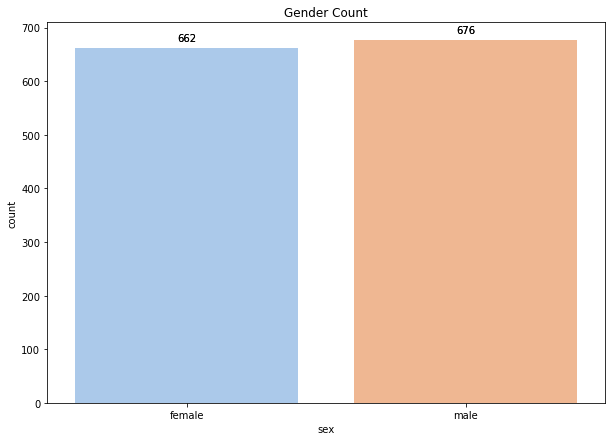

In [8]:
#value count of each unique value in sex column
plt.figure(figsize=(10,7))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

ax = sns.countplot(x='sex', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


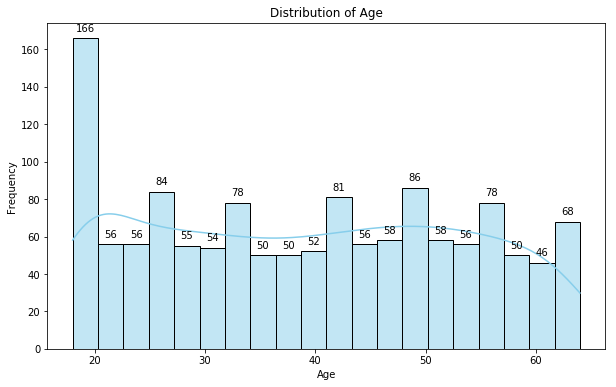

In [9]:
# age distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [10]:
#checking for count of each value in smoker column.
print(df['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


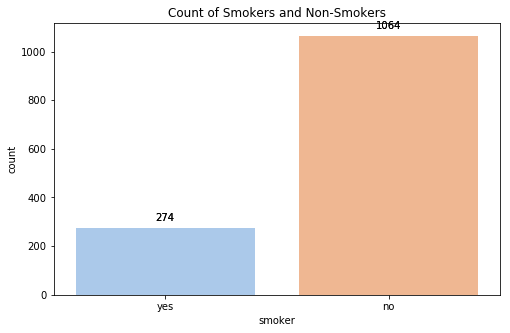

In [11]:
#value count of each unique value in smoker
plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=df, palette='Set2')
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
ax = sns.countplot(x='smoker', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

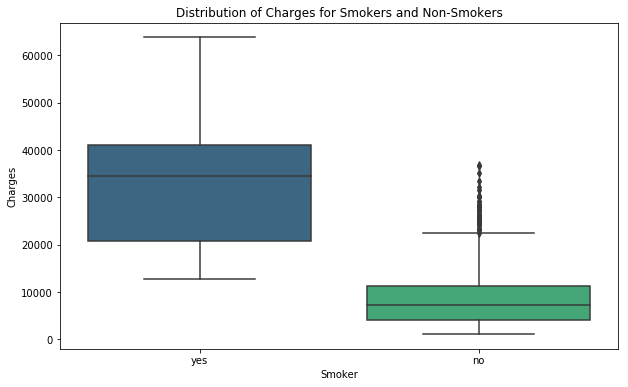

In [12]:
#boxplot for charges based on smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='viridis')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [13]:
print_bold("Original Data Description:\n")
print(df.describe())

Original Data Description:

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [14]:
print(df['region'].value_counts()) #count of each unique value present on the region column

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [15]:
#Cheking for null value present in each column of the data.
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Step 2: Transformation on Data

Transformation encompasses diverse operations on the extracted data, and numerous tools and technologies are available
for this phase. ETL tools like Apache Spark, Microsoft SSIS, and IBM InfoSphere offer powerful transformation capabilities,
supporting data cleansing, enrichment, and aggregation. Programming languages such as Python and libraries like Pandas
provide flexibility for custom transformations.

Data quality tools like Trifacta and Talend Data Quality assist in ensuring
high-quality transformations. Machine learning frameworks like TensorFlow or scikit-learn can be integrated for advanced
data transformations. Cloud-based platforms such as Azure Data Factory and Google Cloud Dataprep also offer transformation
services.

In [16]:
#mapping Sex column i.e. is Male with 0 and Female with 1 for making it numerical.
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [17]:
#mapping Smoker column i.e. is no with 0 and yes with 1 for making it numerical.
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [18]:
#finding unique value present in the region column.
print("Total Unique Regions:", df['region'].nunique())
#getting the list of unique region name.
print("Region Present in the Data:",df['region'].unique().tolist())

Total Unique Regions: 4
Region Present in the Data: ['southwest', 'southeast', 'northwest', 'northeast']


In [19]:
#using label encoder to assign numerical value to the element present in the region for better modelling.
label_encoder = LabelEncoder()
df['region_encoded'] = label_encoder.fit_transform(df['region'])

In [20]:
#one hot encoding on region column for future analysis and better ML model performance
df = pd.get_dummies(df, columns=['region'], prefix='region')
df['region_encoded'] = df['region_encoded'].astype(np.int64)

In [21]:
#getting the numericaly assigned value for each region present in the region column.
region_mapping = list(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print_bold("Mapping done on original region values to encoded values:")
print(region_mapping)

Mapping done on original region values to encoded values:
[('northeast', 0), ('northwest', 1), ('southeast', 2), ('southwest', 3)]


In [22]:
print_bold("Transformed Data Table:\n")
df.head()

Transformed Data Table:



,age,sex,bmi,children,smoker,charges,region_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,3,0,0,0,1
1,18,0,33.770,1,0,1725.55230,2,0,0,1,0
2,28,0,33.000,3,0,4449.46200,2,0,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,1,0,0


# Step 2B : Transformation Data Quality Check.

In [23]:
#expected data types for the transformed Data
expected_data_types = {
    'age': np.int64,
    'sex': np.int64,
    'bmi': np.float64,
    'children': np.int64,
    'smoker': np.int64,
    'charges': np.float64,
    'region_encoded': np.int64,
    'region_northeast': np.uint8,
    'region_northwest': np.uint8,
    'region_southeast': np.uint8,
    'region_southwest': np.uint8
}

data_types_check = df.dtypes.to_dict() == expected_data_types #comparison

sex_smoker_check = (df['sex'].isin([0, 1]).all()) and (df['smoker'].isin([0, 1]).all())

# data quality check
if data_types_check and sex_smoker_check:
    print_bold("\nData Quality Check: Transformation logic verified. Data types and values are as expected.")
    print_bold("\nTransformed Data Info:\n")
    print(df.info())
    
else:
    print_bold("\nData Quality Check: Transformation logic verification failed. Check data types and values.")
    



Data Quality Check: Transformation logic verified. Data types and values are as expected.

Transformed Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_encoded    1338 non-null   int64  
 7   region_northeast  1338 non-null   uint8  
 8   region_northwest  1338 non-null   uint8  
 9   region_southeast  1338 non-null   uint8  
 10  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 78.5 KB
None


# Step 3: Loading data into desired storage.

Loading transformed data into target systems involves various tools and technologies. ETL tools like Apache NiFi and
Talend provide functionalities for designing efficient loading workflows. Relational database management systems (RDBMS)
such as PostgreSQL, MySQL, and SQL Server offer mechanisms for bulk loading and transaction management. NoSQL databases
like MongoDB and cloud-based data warehouses like Amazon Redshift and Google BigQuery support optimized loading strategies.

In [24]:
#Storing value into the assingned local storage.

#uncomment below line to save data in the local storage.
#df.to_csv('transformed_insurance.csv', index=False)
print_bold('The transformed file with the name "transformed_insurance.csv" is being saved successfully on desired location.')

The transformed file with the name "transformed_insurance.csv" is being saved successfully on desired location.


# Creating Server Connection to load transformed data into local SQL server for future desired operation.

In [25]:
import sqlalchemy

In [26]:
#providing neccesary information required to connect with server
server_name = 'LAPTOP-SAMIR\SQLEXPRESS'
database_name = 'Wednesday'
trans_table = "transformed_insurance"  #table name of the data

connection_string = f'mssql+pyodbc://@{server_name}/{database_name}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

print_bold("Server Connection Established")

Server Connection Established


In [27]:
df.to_sql(name= trans_table, con=connection_string, if_exists='replace', index=False) #sending request to server

print_bold(f'Action Completed: The {trans_table} data table is being added to the SQL server under the database {database_name}.\n')

Action Completed: The transformed_insurance data table is being added to the SQL server under the database Wednesday.



In [28]:
#sending test query for the uploaded data on the server
query = "SELECT age, sex, bmi, smoker, charges FROM transformed_insurance"
query_result = pd.read_sql(query, con=connection_string)
print(query_result.head())

   age  sex     bmi  smoker      charges
0   19    1  27.900       1  16884.92400
1   18    0  33.770       0   1725.55230
2   28    0  33.000       0   4449.46200
3   33    0  22.705       0  21984.47061
4   32    0  28.880       0   3866.85520


Note: Server connection needs to be closed after a successful operation to avoid any data loss, to protect overwrite, etc. based on the server used.

# ETL Ends Here

# Task - Data Analysis Using SQL.

Using pandas data frame to get insight from the data using SQL, SQL query is being supported on pandas dataframe using
pandasql library.

We can also transfer this data into SQL database using several libraries to perform analysis in SQL studio in
this method server configuration is required which is supported by the library.

In [29]:
import pandasql as ps

In [30]:
data.head() #first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
data.info() #data info - orginal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using orginal data for analysis using SQL purposely.

# Query - 1 : 

In [32]:
#view table for the data df
table = """
    SELECT * FROM data;
"""

result_table = ps.sqldf(table, locals())
print("Output:\n\n",result_table.head())

Output:

    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Query - 2 : 

In [33]:
#top 5 age which have maximum individual.
query_age_distribution = """
    SELECT
        age,
        COUNT(*) AS count
    FROM
        data
    GROUP BY
        age
    ORDER BY
        count DESC
    LIMIT 5;
"""

result_query_age_distribution = ps.sqldf(query_age_distribution, locals())
print(result_query_age_distribution)


   age  count
0   18     69
1   19     68
2   52     29
3   51     29
4   50     29


# Query - 3 : 

In [34]:
#Find the average charges for each region:
query_avg_charges_region = """
    SELECT
        region,
        AVG(charges) AS avg_charges
    FROM
        data
    GROUP BY
        region;
"""

result_avg_charges_region = ps.sqldf(query_avg_charges_region, locals())
print("Output:\n\n",result_avg_charges_region)

Output:

       region   avg_charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377


# Query - 4 : 

In [35]:
#Find the average charges for smokers and non-smokers:
query_avg_charges_smoker = """
    SELECT
        smoker,
        AVG(charges) AS avg_charges
    FROM
        data
    GROUP BY
        smoker;
"""

result_avg_charges_smoker = ps.sqldf(query_avg_charges_smoker, locals())
print("Output:\n\n",result_avg_charges_smoker)

Output:

   smoker   avg_charges
0     no   8434.268298
1    yes  32050.231832


# Query - 5 : 

In [36]:
#Average Charges by Smoking Status and Gender:
query_avg_charges_by_smoking_gender = """
    SELECT
        smoker,
        sex,
        AVG(charges) AS avg_charges
    FROM
        data
    GROUP BY
        smoker, sex;
"""
result_query_avg_charges_by_smoking_gender = ps.sqldf(query_avg_charges_by_smoking_gender, locals())
print("Output:\n\n",result_query_avg_charges_by_smoking_gender)

Output:

   smoker     sex   avg_charges
0     no  female   8762.297300
1     no    male   8087.204731
2    yes  female  30678.996276
3    yes    male  33042.005975


# Query - 6 : 

In [37]:
#Find the total number of smokers and non-smokers in each region:
query_smoker_count_region = """
    SELECT
        region,
        smoker,
        COUNT(*) AS count
    FROM
        data
    GROUP BY
        region, smoker;
"""

result_smoker_count_region = ps.sqldf(query_smoker_count_region, locals())
print("Output:\n\n",result_smoker_count_region)

Output:

       region smoker  count
0  northeast     no    257
1  northeast    yes     67
2  northwest     no    267
3  northwest    yes     58
4  southeast     no    273
5  southeast    yes     91
6  southwest     no    267
7  southwest    yes     58


# Query - 7 : 

In [38]:
#Find the average BMI for each sex:
query_avg_bmi_sex = """
    SELECT
        sex,
        AVG(bmi) AS avg_bmi
    FROM
        data
    GROUP BY
        sex;
"""

result_avg_bmi_sex = ps.sqldf(query_avg_bmi_sex, locals())
print("Output:\n\n",result_avg_bmi_sex)

Output:

       sex    avg_bmi
0  female  30.377749
1    male  30.943129


# Query - 8 : 

In [39]:
#Find the average charges for individuals with and without children:
query_avg_charges_children = """
    SELECT
        children,
        AVG(charges) AS avg_charges
    FROM
        data
    GROUP BY
        children;
"""

result_avg_charges_children = ps.sqldf(query_avg_charges_children, locals())
print("Output:\n\n",result_avg_charges_children)

Output:

    children   avg_charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247


# Query - 9 : 

In [40]:
#Find the average BMI and charges for each combination of sex and smoker status:
query_avg_bmi_charges_sex_smoker = """
    SELECT
        sex,
        smoker,
        AVG(bmi) AS avg_bmi,
        AVG(charges) AS avg_charges,
        AVG(age) as avg_age
    FROM
        data
    GROUP BY
        sex, smoker;
"""

result_avg_bmi_charges_sex_smoker = ps.sqldf(query_avg_bmi_charges_sex_smoker, locals())
print("Output:\n\n",result_avg_bmi_charges_sex_smoker)

Output:

       sex smoker    avg_bmi   avg_charges    avg_age
0  female     no  30.539525   8762.297300  39.691042
1  female    yes  29.608261  30678.996276  38.608696
2    male     no  30.770580   8087.204731  39.061896
3    male    yes  31.504182  33042.005975  38.446541


# Query - 10 : 

In [41]:
#Determine the average charges for individuals with different numbers of children, grouped by smoker status:
query_avg_charges_children_smoker = """
    SELECT
        children,
        smoker,
        AVG(charges) AS avg_charges
    FROM
        data
    GROUP BY
        children, smoker;
"""

result_avg_charges_children_smoker = ps.sqldf(query_avg_charges_children_smoker, locals())
print("Output:\n\n",result_avg_charges_children_smoker)

Output:

     children smoker   avg_charges
0          0     no   7611.793335
1          0    yes  31341.363954
2          1     no   8303.109350
3          1    yes  31822.654334
4          2     no   9493.093674
5          2    yes  33844.235755
6          3     no   9614.519391
7          3    yes  32724.915268
8          4     no  12121.344408
9          4    yes  26532.276933
10         5     no   8183.845556
11         5    yes  19023.260000


# Query - 11 : 

In [42]:
#Find the top 5 individuals with the highest charges:
query_top5_highest_charges = """
    SELECT
        *
    FROM
        data
    ORDER BY
        charges DESC
    LIMIT 5;
"""

result_top5_highest_charges = ps.sqldf(query_top5_highest_charges, locals())
print("Output:\n\n",result_top5_highest_charges)

Output:

    age     sex     bmi  children smoker     region      charges
0   54  female  47.410         0    yes  southeast  63770.42801
1   45    male  30.360         0    yes  southeast  62592.87309
2   52    male  34.485         3    yes  northwest  60021.39897
3   31  female  38.095         1    yes  northeast  58571.07448
4   33  female  35.530         0    yes  northwest  55135.40209


# Query - 12 : 

In [43]:
#top 2 individuals from each region with the highest charges
query_top2_highest_charges_per_region = """
    SELECT region,
        age,
        sex,
        bmi,
        children,
        smoker,
        charges
    FROM (
        SELECT * ,
            ROW_NUMBER() OVER (PARTITION BY region ORDER BY charges DESC) AS row_num
        FROM
            data
    ) ranked
    WHERE
        row_num <= 2
    ORDER BY
        region, row_num;
"""

result_top2_highest_charges_per_region = ps.sqldf(query_top2_highest_charges_per_region, locals())
print("Output:\n\n",result_top2_highest_charges_per_region)

Output:

       region  age     sex     bmi  children smoker      charges
0  northeast   31  female  38.095         1    yes  58571.07448
1  northeast   54    male  40.565         3    yes  48549.17835
2  northwest   52    male  34.485         3    yes  60021.39897
3  northwest   33  female  35.530         0    yes  55135.40209
4  southeast   54  female  47.410         0    yes  63770.42801
5  southeast   45    male  30.360         0    yes  62592.87309
6  southwest   60    male  32.800         0    yes  52590.82939
7  southwest   28    male  36.400         1    yes  51194.55914


# Task Ends Here